Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [121]:
import json
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import json

# Load bike station data

df_bicing = pd.read_csv("bicing.csv").reset_index().rename(columns={"index": "Station_ID"})
# Load foursquare responses (full POI data)
with open("foursquare_responses.json", "r") as f:
    foursquare_responses = json.load(f)

# Load category summaries (category counts per station)
with open("category_summaries.json", "r") as f:
    category_summaries = json.load(f)



In [122]:
# Convert category summaries to DataFrame
df_categories = pd.DataFrame(category_summaries).fillna(0)

# Add Station_ID so we can merge
df_categories["Station_ID"] = df_categories.index


In [123]:
# Normalize all responses into one df_pois
all_poi_dfs = []

for station_id, response in enumerate(foursquare_responses):
    if "results" in response:
        df_temp = pd.json_normalize(response["results"])
        df_temp["Station_ID"] = station_id
        all_poi_dfs.append(df_temp)

# Combine all POI DataFrames
df_pois = pd.concat(all_poi_dfs).reset_index(drop=True)

# Merge POIs with stations
df_combined = pd.merge(df_pois, df_bicing, on="Station_ID", how="left")

# Merge category summaries with stations
df_bicing_enriched = pd.merge(df_bicing, df_categories, on="Station_ID", how="left")

df_combined.head(5)


,fsq_id_x,categories,chains,closed_bucket,distance,link,name_x,timezone,geocodes.main.latitude,geocodes.main.longitude,...,related_places.parent.fsq_id,related_places.parent.categories,related_places.parent.name,Unnamed: 0,name_y,longitude,latitude,free_bikes,empty_slots,fsq_id_y
0,4c5a939db05c1b8d577ed8b1,"[{'id': 13003, 'name': 'Bar', 'short_name': 'B...",[],LikelyOpen,48,/v3/places/4c5a939db05c1b8d577ed8b1,Vermuteria Lou,Europe/Madrid,41.405910,2.162397,...,NaN,NaN,NaN,0.0,"PL JOANIC - C / BRUNIQUER, 59",2.162255,41.40552,14.0,1.0,00028670e3d01438515caba403ffd680
1,4adcda51f964a520c94121e3,"[{'id': 16041, 'name': 'Plaza', 'short_name': ...",[],VeryLikelyOpen,301,/v3/places/4adcda51f964a520c94121e3,Plaça de John Lennon,Europe/Madrid,41.402858,2.161527,...,NaN,NaN,NaN,0.0,"PL JOANIC - C / BRUNIQUER, 59",2.162255,41.40552,14.0,1.0,00028670e3d01438515caba403ffd680
2,55573c68498e02e9aa9715f3,"[{'id': 13302, 'name': 'Mediterranean Restaura...",[],VeryLikelyOpen,361,/v3/places/55573c68498e02e9aa9715f3,La Catrina,Europe/Madrid,41.407947,2.159362,...,NaN,NaN,NaN,0.0,"PL JOANIC - C / BRUNIQUER, 59",2.162255,41.40552,14.0,1.0,00028670e3d01438515caba403ffd680
3,4b3cb241f964a5203a8625e3,"[{'id': 13155, 'name': 'Catalan Restaurant', '...",[],LikelyOpen,374,/v3/places/4b3cb241f964a5203a8625e3,Cal Boter,Europe/Madrid,41.402166,2.162457,...,NaN,NaN,NaN,0.0,"PL JOANIC - C / BRUNIQUER, 59",2.162255,41.40552,14.0,1.0,00028670e3d01438515caba403ffd680
4,50d773bfe4b004dce4232420,"[{'id': 10026, 'name': 'Indie Movie Theater', ...",[],LikelyOpen,396,/v3/places/50d773bfe4b004dce4232420,Verdi Park,Europe/Madrid,41.404424,2.157652,...,NaN,NaN,NaN,0.0,"PL JOANIC - C / BRUNIQUER, 59",2.162255,41.40552,14.0,1.0,00028670e3d01438515caba403ffd680


In [116]:
df_bicing_enriched.to_csv('df_bicing_enriched.csv')

In [117]:
df_bicing_enriched.head()

,Station_ID,Unnamed: 0,name,longitude,latitude,free_bikes,empty_slots,bar,mediterranean restaurant,tapas restaurant,...,alternative medicine clinic,industrial equipment supplier,chaat place,fuel station,retail,language school,hair salon,children's clothing store,"heating, ventilating and air conditioning contractor",insurance agency
0,0,0,"PL JOANIC - C / BRUNIQUER, 59",2.162255,41.405520,0,16,3.0,8.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,"C/ SARDENYA, 178",2.182508,41.396717,19,16,1.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,"PL. CATALUNYA, 7",2.169427,41.386543,0,26,3.0,2.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,"C/ VILADOMAT, 200",2.150807,41.384810,10,11,4.0,4.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,"C/ DEL DOCTOR TRUETA, 222",2.204141,41.399217,19,4,5.0,7.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

Here’s the visualization plan:

We'll plot the number of free bikes on the y-axis.

On the x-axis, we'll show the number of restaurants near each station.

This will help us see if there’s any trend, for instance, whether stations with more restaurants nearby tend to have fewer bikes available (or vice versa).

In [126]:
# Check missing data in df_bicing_enriched
missing_bicing_enriched = df_bicing_enriched.isnull().mean() * 100

# Print missing data summary for df_bicing_enriched
print("Missing Data in df_bicing_enriched:")
print(missing_bicing_enriched.sort_values(ascending=False))


Missing Data in df_bicing_enriched:
Station_ID                0.0
donut shop                0.0
miscellaneous store       0.0
car dealership            0.0
polish restaurant         0.0
                         ... 
asian restaurant          0.0
meat and seafood store    0.0
butcher                   0.0
arts and entertainment    0.0
insurance agency          0.0
Length: 344, dtype: float64


In [127]:
# Summary statistics for df_bicing_enriched
print("Summary statistics for df_bicing_enriched:")
print(df_bicing_enriched.describe())


Summary statistics for df_bicing_enriched:
       Station_ID  Unnamed: 0   longitude    latitude  free_bikes  \
count  514.000000  514.000000  514.000000  514.000000  514.000000   
mean   256.500000  256.500000    2.167906   41.399122    7.134241   
std    148.523287  148.523287    0.024525    0.021317    6.335293   
min      0.000000    0.000000    2.109154   41.346775    0.000000   
25%    128.250000  128.250000    2.148811   41.383232    2.000000   
50%    256.500000  256.500000    2.170492   41.395441    5.000000   
75%    384.750000  384.750000    2.187011   41.411738   11.000000   
max    513.000000  513.000000    2.220691   41.462095   41.000000   

       empty_slots         bar  mediterranean restaurant  tapas restaurant  \
count   514.000000  514.000000                514.000000        514.000000   
mean     17.313230    3.435798                  3.455253          5.301556   
std       7.725375    2.022477                  2.360110          3.242703   
min       0.000000    0

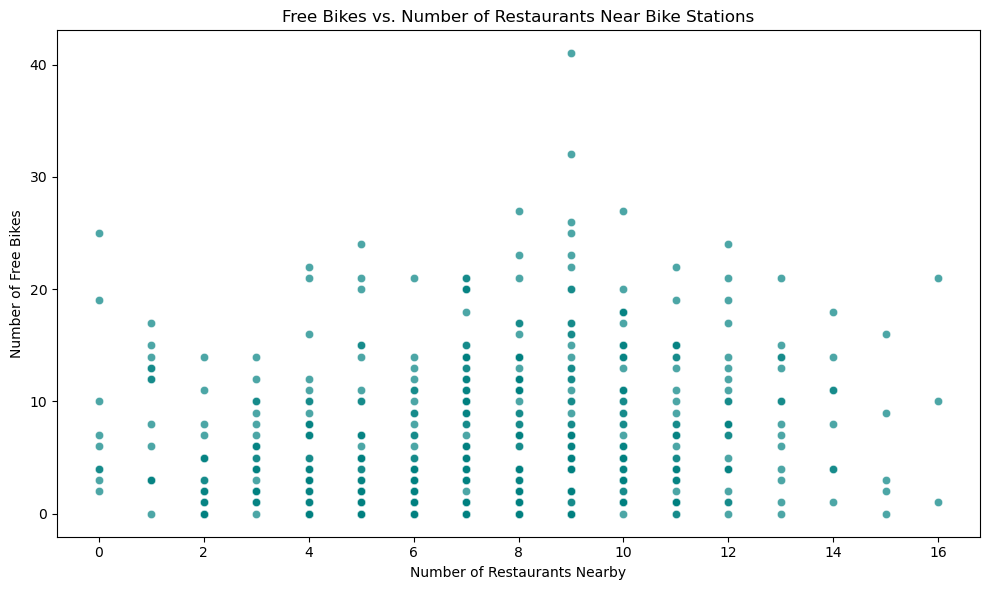

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the data you're working with is clean
df_bicing_enriched = df_bicing_enriched.dropna(subset=['free_bikes', 'restaurant'])

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_bicing_enriched, x='restaurant', y='free_bikes', color='teal', alpha=0.7)

# Adding labels and title
plt.title('Free Bikes vs. Number of Restaurants Near Bike Stations')
plt.xlabel('Number of Restaurants Nearby')
plt.ylabel('Number of Free Bikes')
plt.tight_layout()

plt.show()


In [107]:
# Summarize the relationship between the number of free bikes and restaurants near bike stations
summary = df_bicing_enriched[['restaurant', 'free_bikes']].describe()

# Print the summary statistics to understand the distribution
print("Summary of Free Bikes vs. Number of Restaurants Nearby")
print(summary)

# Check for correlation between free bikes and nearby restaurants
correlation = df_bicing_enriched['restaurant'].corr(df_bicing_enriched['free_bikes'])

print(f"\nCorrelation between number of restaurants and number of free bikes: {correlation:.2f}")


Summary of Free Bikes vs. Number of Restaurants Nearby
       restaurant  free_bikes
count  515.000000  515.000000
mean     7.407767    8.374757
std      3.300857    7.352528
min      0.000000    0.000000
25%      5.000000    2.000000
50%      7.000000    7.000000
75%     10.000000   13.000000
max     16.000000   39.000000

Correlation between number of restaurants and number of free bikes: 0.13


The analysis of the relationship between the number of free bikes and the number of nearby restaurants shows a weak correlation of 0.13. This suggests that the two variables are largely independent of each other. On average, bike stations have around 7.4 restaurants nearby, with a range from 0 to 16, while the average number of free bikes available is 8.37, with a range from 0 to 39. Although the number of free bikes and restaurants exhibit some variability, the correlation is not strong enough to suggest a meaningful connection between the two. This weak relationship indicates that factors affecting bike availability, such as station demand and location, likely differ from those influencing the presence of restaurants. Further exploration into other variables, such as time of day or geographic factors, could provide more insights into the dynamics of bike availability and nearby amenities.



# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [ ]:
import os
import sqlite3
import pandas as pd  

# Define your project and data directory
project_dir = os.path.expanduser('~/Documents/LHL_Projects/Python-Final-Project')  # Adjust if needed
data_dir = os.path.join(project_dir, 'data')

# Make sure the data/ directory exists
os.makedirs(data_dir, exist_ok=True)

# Define the SQLite database path
db_path = os.path.join(data_dir, 'bike_poi_data.db')

# If the database already exists from earlier with bad schema, delete it (optional but recommended)
if os.path.exists(db_path):
    os.remove(db_path)

# Connect to the database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Create tables with the correct schema
cursor.execute('''
CREATE TABLE IF NOT EXISTS bike_stations (
    Station_ID INTEGER PRIMARY KEY,
    Name TEXT,
    Latitude REAL,
    Longitude REAL,
    Free_Bikes INTEGER,
    Empty_Slots INTEGER
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS pois (
    POI_ID TEXT PRIMARY KEY,
    Name TEXT,
    Rating TEXT,
    Latitude REAL,
    Longitude REAL,
    Location TEXT,
    Category TEXT,
    Distance INTEGER,
    Station_ID INTEGER,
    FOREIGN KEY (Station_ID) REFERENCES bike_stations(Station_ID)
)
''')

# Insert data into bike_stations
for _, row in df_bicing.iterrows():
    cursor.execute('''
    INSERT OR REPLACE INTO bike_stations (Station_ID, Name, Latitude, Longitude, Free_Bikes, Empty_Slots)
    VALUES (?, ?, ?, ?, ?, ?)
    ''', (row['Station_ID'], row['name'], row['latitude'], row['longitude'], row['free_bikes'], row['empty_slots']))

# Insert data into pois
for _, row in df_pois.iterrows():
    cursor.execute('''
    INSERT OR REPLACE INTO pois (POI_ID, Name, Latitude, Longitude, Location, Category, Distance, Station_ID)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?)
    ''', (
        row['fsq_id'],  # This is TEXT now!
        row['name'],
        row['geocodes.main.latitude'],
        row['geocodes.main.longitude'],
        row.get('location.address', None),
        row['category_name'],
        row['distance'],
        row['Station_ID']
    ))

# Commit and close
conn.commit()
conn.close()

print(f" Database successfully created and populated at: {db_path}")


 Database successfully created and populated at: /Users/renudinesh/Documents/LHL_Projects/Python-Final-Project/data/bike_poi_data.db


Look at the data before and after the join to validate your data.

In [95]:
# Step 1: Look at the data before the join
print("Bike Stations Data (df_bicing):")
print(df_bicing.head())  # First few rows of bike stations

print("\n POIs Data (df_pois):")
print(df_pois.head())  # First few rows of POIs

# Step 2: Perform the join on Station_ID
df_combined = pd.merge(df_pois, df_bicing, on='Station_ID', how='left')

# Step 3: Look at the data after the join
print("\n Combined Data After Join (df_combined):")
print(df_combined.head())

# Optional: Check for nulls after join (helps validate join quality)
print("\n Null Check After Join:")
print(df_combined.isnull().sum())


Bike Stations Data (df_bicing):
   Station_ID  Unnamed: 0                             name  longitude  \
0           0           0   PL  JOANIC - C / BRUNIQUER, 59   2.162255   
1           1           1                C/ SARDENYA,  178   2.182508   
2           2           2                 PL. CATALUNYA, 7   2.169427   
3           3           3                C/ VILADOMAT, 200   2.150807   
4           4           4        C/ DEL DOCTOR TRUETA, 222   2.204141   

    latitude  free_bikes  empty_slots  
0  41.405520           0           16  
1  41.396717          19           16  
2  41.386543           0           26  
3  41.384810          10           11  
4  41.399217          19            4  

 POIs Data (df_pois):
                     fsq_id  \
0  4c5a939db05c1b8d577ed8b1   
1  4adcda51f964a520c94121e3   
2  55573c68498e02e9aa9715f3   
3  4b3cb241f964a5203a8625e3   
4  50d773bfe4b004dce4232420   

                                          categories chains   closed_bucket  \


In [ ]:

# Optional: Check for nulls after join (helps validate join quality)
print("\n Null Check After Join:")
print(df_combined.isnull().sum())


 Null Check After Join:
fsq_id                                  0
categories                              0
chains                                  0
closed_bucket                           0
distance                                0
link                                    0
name_x                                  0
timezone                                0
geocodes.main.latitude                  0
geocodes.main.longitude                 0
geocodes.roof.latitude               3703
geocodes.roof.longitude              3703
location.address                     1555
location.address_extended           22176
location.admin_region                 117
location.country                        0
location.cross_street                5322
location.formatted_address              0
location.locality                     100
location.postcode                    1650
location.region                       156
geocodes.drop_off.latitude           9608
geocodes.drop_off.longitude          9608
related_p

In [94]:
print(df_combined.head())


                     fsq_id  \
0  4c5a939db05c1b8d577ed8b1   
1  4adcda51f964a520c94121e3   
2  55573c68498e02e9aa9715f3   
3  4b3cb241f964a5203a8625e3   
4  50d773bfe4b004dce4232420   

                                          categories chains   closed_bucket  \
0  [{'id': 13003, 'name': 'Bar', 'short_name': 'B...     []      LikelyOpen   
1  [{'id': 16041, 'name': 'Plaza', 'short_name': ...     []  VeryLikelyOpen   
2  [{'id': 13302, 'name': 'Mediterranean Restaura...     []  VeryLikelyOpen   
3  [{'id': 13155, 'name': 'Catalan Restaurant', '...     []      LikelyOpen   
4  [{'id': 10026, 'name': 'Indie Movie Theater', ...     []      LikelyOpen   

   distance                                 link                name_x  \
0        48  /v3/places/4c5a939db05c1b8d577ed8b1        Vermuteria Lou   
1       301  /v3/places/4adcda51f964a520c94121e3  Plaça de John Lennon   
2       361  /v3/places/55573c68498e02e9aa9715f3            La Catrina   
3       374  /v3/places/4b3cb241f964a5203a

In [100]:
df_combined.to_csv('/Users/renudinesh/Documents/LHL_Projects/Python-Final-Project/data/combined_bike_poi.csv', index=False)


In [103]:
# Quick test query
conn = sqlite3.connect(db_path)
df_test = pd.read_sql_query("""
SELECT b.Name AS Station, p.Name AS POI, p.Category, p.Distance 
FROM pois p
JOIN bike_stations b ON b.Station_ID = p.Station_ID
LIMIT 5
""", conn)
print(df_test)
conn.close()


                           Station           POI            Category  Distance
0   PL  JOANIC - C / BRUNIQUER, 59       Olokuti          gift store       657
1                C/ SARDENYA,  178        Vivant  catalan restaurant       831
2         AV. RASOS DE PEGUERA, 10  Sorli Discau       grocery store        56
3         AV. RASOS DE PEGUERA, 10       Correos         post office       119
4         AV. RASOS DE PEGUERA, 10    Ca la Mari             butcher        95


In [104]:
print(f"Total POIs: {len(df_pois)}, Total Bike Stations: {len(df_bicing)}")
print(f"POIs matched to stations: {df_combined['Station_ID'].notnull().sum()}")


Total POIs: 23627, Total Bike Stations: 515
POIs matched to stations: 23627
